# Computer assignment in Linear Algebra 2
## by Teodor Zacke, Caisa Kjellström and Nikolag Skog Pirinen

## Task 1

In [65]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import scipy as sp
import scipy.optimize as opt
import numpy as np
import scipy.linalg as li

%matplotlib notebook

Import only what you need!

In [67]:
A = np.array([[1,1,2],
             [1,2,1],
             [2,1,1],
             [2,2,1]])

y = np.array([1,-1,1,-1])

Create what you need. Now solve it first with the normal equations (AtAx = Aty)

In [69]:
# Since this is a computer, it does not need to think like I do. I do this now. (Aty (At-1A-1) = x)
#X = sp.dot(sp.dot(sp.transpose(A), y), li.inv(sp.dot(sp.transpose(A), A)))
def leastsq1(A, y):
    At = sp.transpose(A)
    AtA = sp.dot(At, A)
    x = li.solve(AtA, sp.dot(At, y))
    return x

# Let us use magical python functions. We will create a function that returns ||Ax-y|| and look for the smallest solution.
def leastsq2(A, y):
    lit12 = lambda x: li.norm(sp.dot(A, x) - y)
    resu12 = opt.fmin(lit12, np.array([0,0,0]))
    return resu12

print(leastsq1(A, y), leastsq2(A, y))

Optimization terminated successfully.
         Current function value: 0.507093
         Iterations: 132
         Function evaluations: 236
[ 0.6        -1.4         0.94285714] [ 0.60000806 -1.40000604  0.94282842]


<IPython.core.display.Javascript object>


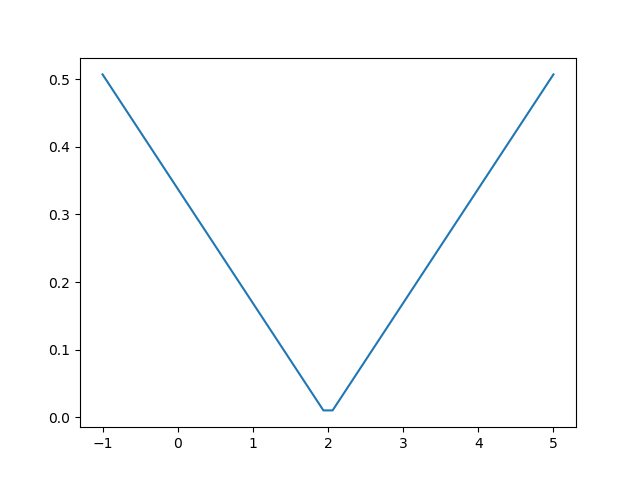

In [134]:
# First, we find the x which depends on a using the normal equation. Then we make the function return the norm of the residual.
A = np.array([[1,1,2],
             [1,2,1],
             [2,1,1],
             [2,2,1]])
def peacock(a):
    y = np.array([1,a,1,a])
    At = sp.transpose(A)
    AtA = sp.dot(At, A)
    x = li.solve(AtA, sp.dot(At, y))
    return li.norm(sp.dot(A, x) - y) 

xlist = np.linspace(-1,5)
plt.figure()
plt.plot(xlist, [peacock(i) for i in xlist])

In [135]:
# Simply finds the a for which the norm of the residual is the smallest.
def leastsq3():
    return opt.fmin(peacock, 0)

print(leastsq3())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54
[2.]


In [136]:
# Time for task 2. We define the 3x3 matrix A and also the z0 vector.
A = np.array([[1,3,2],
              [-3,4,3],
              [2,3,1]])

z0 = np.array([8,3,12])
# We also find the eigenvalues and eigenvectors for A, and solve for the 
eigva, eigve = sp.linalg.eig(A)
cve = li.solve(eigve, z0) # Here, we solve the equation ec=z0 where c is the vector z0 with respect to the eigenvectors.

In [137]:
# The uk function take an input k, and returns the value zk.
uk = lambda k: np.real(np.dot(eigve*eigva**k, cve))
# The norm function also takes an input k, but returns an output zk/||zk||
norm = lambda k: np.real(sp.multiply(uk(k), sp.power(li.norm(uk(k)), -1)))

<IPython.core.display.Javascript object>


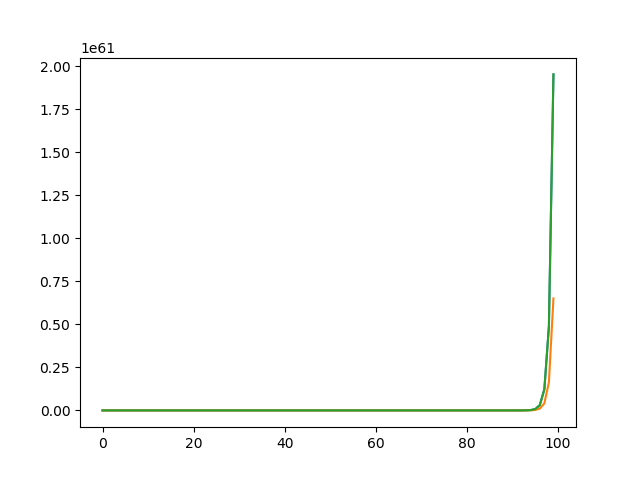

In [138]:
# This is pretty conclusive. The plot considers values z(k+1)-z(k), and since this plot does not converge, but instead
# goes to 1e61 in only 100 iterations, it's most likely that zk does not converge.
plt.figure()
plt.plot(range(100), [(uk(i+1)-uk(i))[0] for i in range(100)])
plt.plot(range(100), [(uk(i+1)-uk(i))[1] for i in range(100)])
plt.plot(range(100), [(uk(i+1)-uk(i))[2] for i in range(100)])
plt.show()

<IPython.core.display.Javascript object>


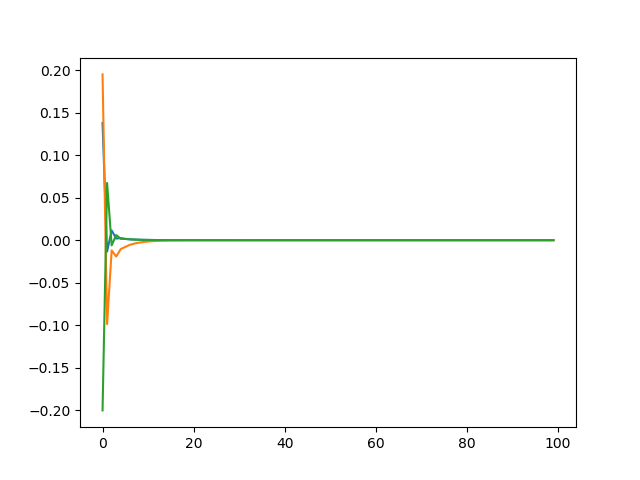

In [139]:
# But does zk//||zk|| converge? Let's also call this vector zn instead, please. 
# We inspect the values in the same manner as we did previously.
plt.figure()
plt.plot(range(100), [(norm(i+1)-norm(i))[0] for i in range(100)])
plt.plot(range(100), [(norm(i+1)-norm(i))[1] for i in range(100)])
plt.plot(range(100), [(norm(i+1)-norm(i))[2] for i in range(100)])
plt.show()
# We can very clearly see that z(n+1)-zn converges to zero, meaning that zn converges.
Z = norm(500)  
# Z is the limit to which zn converges to. By plugging these values into Wolfram Alpha, we got some exact and pretty values.
Z = 19**(-0.5) * np.array([3,1,3])

<IPython.core.display.Javascript object>


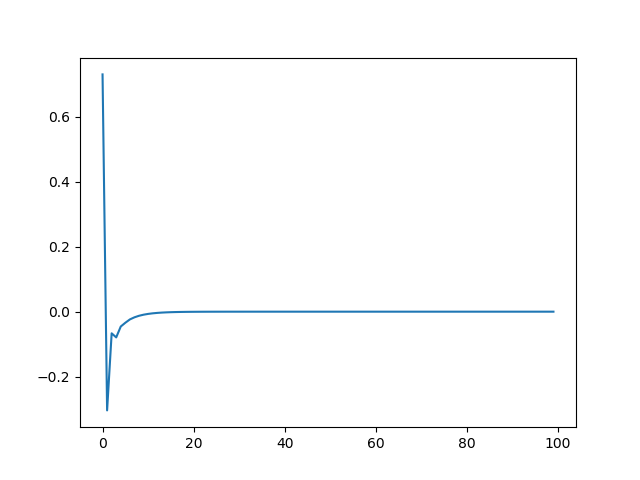

3.9999999999999964

In [140]:
# Okay, what is qn? Where qn=znT A zn
que = lambda k: sp.dot(sp.dot(sp.transpose(norm(k)), A), norm(k))
# We inspect the values in the same manner as we did previously.
plt.figure()
plt.plot(range(100), [(que(i+1)-que(i)) for i in range(100)])
plt.show()
# Yeehaw! qn converges!
# to what?
que(500)
# Almost exactly 4 (let's just say it actually is 4).

In [141]:
# Now, let's check out how many iterates we need to fulfill ||zn-Z||<e
def pops(e):
    i = 0
    while li.norm(norm(i)-Z) > e:
        i += 1
    return i  
# This function takes an input e (which is supposed to be something like 1e-14) and finds the first value of zn
# where the norm of zn - Z is below this input e. When it finds this, it stops and ouputs the iterate number i.
# For example, e = 1e-8:
print(pops(1e-8), norm(pops(1e-8)))
# At the 57th iteration, the residual here is 1e-8.

57 [0.6882472  0.22941574 0.6882472 ]


<IPython.core.display.Javascript object>


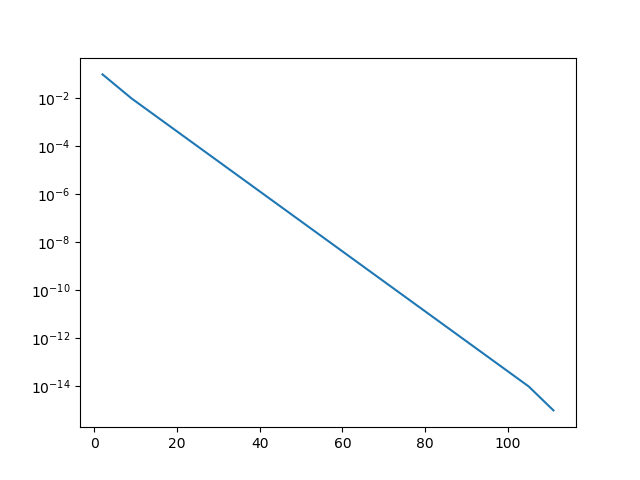

In [142]:
# Let's plot the number of iterates i versus the tolerance e (from 1e-1 to 1e-16) ((and on a semilog plot))
tollist = [10**(-i) for i in range(1,16)]
iterlist = [pops(i) for i in tollist]
plt.figure()
plt.semilogy(iterlist, tollist)

<IPython.core.display.Javascript object>


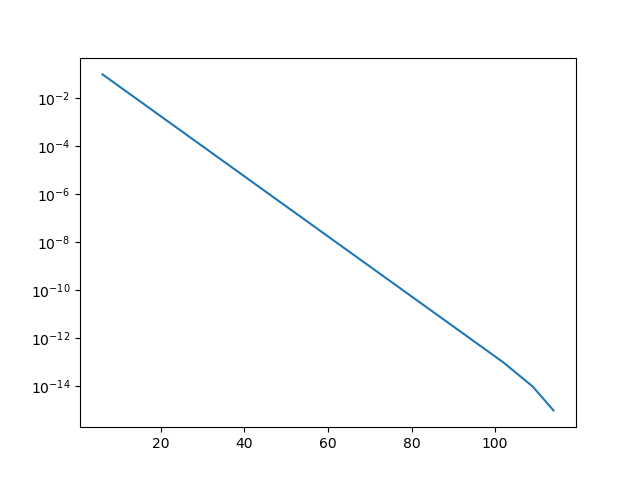

In [143]:
# Now the exact same, but qn.
def qpops(e):
    i = 0
    while li.norm(que(i)-4) > e:
        i += 1
    return i 
# Let's plot the number of iterates i versus the tolerance e (from 1e-1 to 1e-16) ((and on a semilog plot))
tollist = [10**(-i) for i in range(1,16)]
iterlist = [qpops(i) for i in tollist]
plt.figure()
plt.semilogy(iterlist, tollist)
# It seems that zn and qn converges at the same speed.

<IPython.core.display.Javascript object>


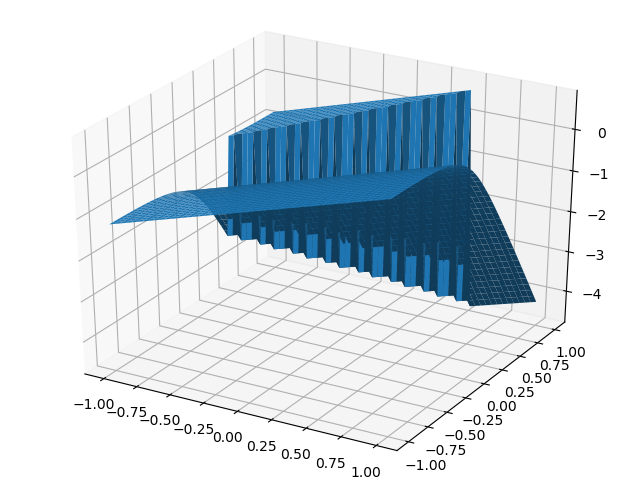

In [144]:
## Now! The third and final task.
def f(x,y):
    def fz(z):
        return 2*x**2-y**2+2*z**2-10*x*y-4*x*z+10*y*z-1
    return opt.fsolve(fz, -2)
# This is the simple function that takes an input (x,y) and guesses the (z) based on the condition that fz=0.

# Let's plot it.
fig = plt.figure() 
ax = p3.Axes3D(fig)

xl = np.linspace(-1,1)
yl = xl
X, Y = np.meshgrid(xl, yl) 
z=[]
for (x,y) in zip(X,Y): 
    z.append([f(i,j) for (i,j) in zip(x,y)])
Z = np.squeeze(np.asarray(z)) 
ax.plot_surface(X, Y, Z)